Run the following line if you don't have any of the libraries

In [1]:
# %%bash
# pip install statsmodels pandas numpy

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

import data_prep

In [3]:
data_prep.get_lagged("./data/XLE_energy_etf.csv", n=3)

,Open,High,Low,Close,Adj Close,Volume,Adj Close_1,Adj Close_2,Adj Close_3
Date,,,,,,,,,
2010-01-07,59.740002,60.009998,59.299999,59.910000,45.627445,17449500,45.695988,45.155247,44.789688
2010-01-08,59.700001,60.349998,59.490002,60.299999,45.924469,13344300,45.627445,45.695988,45.155247
2010-01-11,60.689999,60.869999,59.730000,60.220001,45.863533,19459900,45.924469,45.627445,45.695988
2010-01-12,59.299999,59.709999,59.040001,59.349998,45.200943,21510600,45.863533,45.924469,45.627445
2010-01-13,59.320000,59.799999,58.520000,59.570000,45.368496,22137500,45.200943,45.863533,45.924469
...,...,...,...,...,...,...,...,...,...
2020-03-16,27.950001,31.120001,27.670000,27.809999,27.809999,40233600,32.189999,29.469999,33.669998
2020-03-17,28.080000,29.180000,26.950001,28.000000,28.000000,45443600,27.809999,32.189999,29.469999
2020-03-18,26.040001,26.580000,22.879999,23.980000,23.980000,52135800,28.000000,27.809999,32.189999


In [4]:
pd.read_csv("./data/SnP_500.csv", index_col="Date").head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


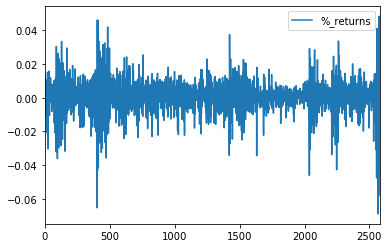

In [5]:
df_perc_returns = data_prep.get_perc_return("./data/SnP_500.csv", column_name="Open")
df_perc_returns.plot()

The way returns are distributed shows a stationary process with no correlation with time 
This also leads us to try out GARCH models since we proabably can model these spikes in volatility.

Following which, we'll look at the full dataset, a concatnation of all the variables together with S&P500

In [6]:
df, idx_psuedo_OOB, idx_OOB = data_prep.split_data("./data/output.csv")
full_df = pd.read_csv("./data/output.csv")

full_df = full_df.set_index("Date")

Columns are laballed as such:  VARIABLE_SECTOR

In [7]:
SNP_daily_ret = (df['Adj Close_SNP500']/df['Adj Close_SNP500'].shift(1)) - 1
SNP_daily_ret = SNP_daily_ret.dropna()

In [8]:
mod = AutoReg(SNP_daily_ret, 1)
res = mod.fit()
res.summary()

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2387
Model:                     AutoReg(1)   Log Likelihood                7758.794
Method:               Conditional MLE   S.D. of innovations              0.009
Date:                Fri, 10 Apr 2020   AIC                             -9.339
Time:                        20:15:59   BIC                             -9.332
Sample:                             1   HQIC                            -9.336
                                 2387                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               0.0005      0.000      2.411      0.016    8.66e-05       0.001
Adj Close_SNP500.L1    -0.0455      0.020     -2.227      0.026      -0.086      -0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -21.9599           +0.0000j           21.9599            0.5000
-----------------------------------------------------------------------------
"""

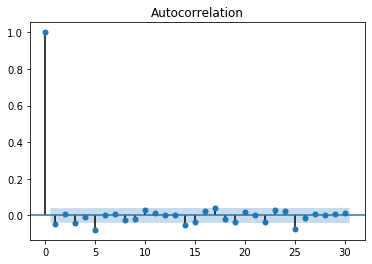

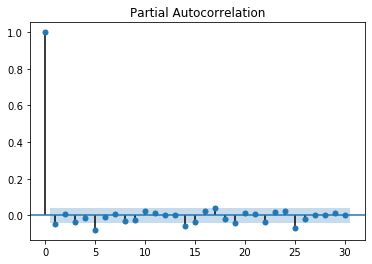

In [9]:
plot_acf(SNP_daily_ret, lags=30)
plt.show()
plot_pacf(SNP_daily_ret, lags=30)
plt.show()

The ACF shows that after lags of t=2, autocorrelation stays near 0 which means a **MA(2)** model

The PACF shows that after lags of t=2, autocorrelation stays near 0 which means an **AR(2)** model

In [10]:
mod = AutoReg(SNP_daily_ret, 2)
res = mod.fit()
res.summary()

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2387
Model:                     AutoReg(2)   Log Likelihood                7755.117
Method:               Conditional MLE   S.D. of innovations              0.009
Date:                Fri, 10 Apr 2020   AIC                             -9.338
Time:                        20:15:59   BIC                             -9.328
Sample:                             2   HQIC                            -9.334
                                 2387                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               0.0005      0.000      2.388      0.017    8.23e-05       0.001
Adj Close_SNP500.L1    -0.0452      0.020     -2.206      0.027      -0.085      -0.005
Adj Close_SNP500.L2     0.0079      0.020      0.387      0.699      -0.032       0.048
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -8.7414           +0.0000j            8.7414            0.5000
AR.2           14.4468           +0.0000j           14.4468            0.0000
-----------------------------------------------------------------------------
"""

In [11]:
ar2 = ARMA(SNP_daily_ret, order=[2,0])
ar2_fit = ar2.fit(disp=0)
print (ar2_fit.summary())
print('\n')

ma2 = ARMA(SNP_daily_ret, order=[0,2])
ma2_fit = ma2.fit(disp=0)
print (ma2_fit.summary())
print('\n')

arma11 = ARMA(SNP_daily_ret, order=[1,1])
arma11_fit = arma11.fit(disp=0)
print (arma11_fit.summary())
print('\n')


c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2387
Model:                     ARMA(2, 0)   Log Likelihood                7762.579
Method:                       css-mle   S.D. of innovations              0.009
Date:                Fri, 10 Apr 2020   AIC                         -15517.157
Time:                        20:15:59   BIC                         -15494.046
Sample:                             0   HQIC                        -15508.747
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0004      0.000      2.402      0.016    8.16e-05       0.001
ar.L1.Adj Close_SNP500    -0.0452      0.020     -2.207      0.027      -0.085      -0.005
ar.L

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index 

                              ARMA Model Results                              
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2387
Model:                     ARMA(1, 1)   Log Likelihood                7764.148
Method:                       css-mle   S.D. of innovations              0.009
Date:                Fri, 10 Apr 2020   AIC                         -15520.297
Time:                        20:16:00   BIC                         -15497.186
Sample:                             0   HQIC                        -15511.887
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0004      0.000      2.366      0.018    7.61e-05       0.001
ar.L1.Adj Close_SNP500    -0.7796      0.128     -6.103      0.000      -1.030      -0.529
ma.L

AIC values for all the models are extremely similar and hence we look to BIC to decide the best model()

It seems like AR(2) does the best out of all the models.

However, as shown later, adding MA(q) to AR(2) to eliminate autocorrelations yields higher AIC than ARMA(1,1).

In [12]:
## some usful attributes that might be used in future
"""
arma22_fit.aic
arma22_fit.bic
arma22_fit.fittedvalues  ## return fitted values of the model
arma22_fit.predict(start=2568, end=2570)
"""

'\narma22_fit.aic\narma22_fit.bic\narma22_fit.fittedvalues  ## return fitted values of the model\narma22_fit.predict(start=2568, end=2570)\n'

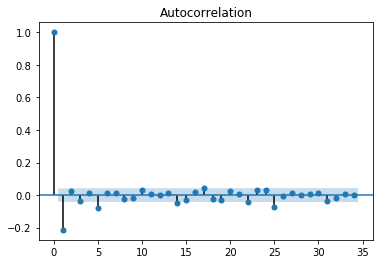

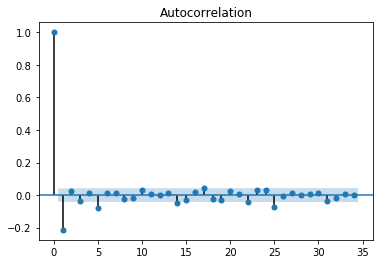

In [13]:
plot_acf(ar2_fit.fittedvalues)

2 lags are present in AR(2) model so we try to fit ARMA(2,2) to rid of the autocorrelations.

In [14]:
arma22 = ARMA(SNP_daily_ret, order=[2,2])
arma22_fit = arma22.fit(disp=0)
print (arma22_fit.summary())
print('\n')

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2387
Model:                     ARMA(2, 2)   Log Likelihood                7770.862
Method:                       css-mle   S.D. of innovations              0.009
Date:                Fri, 10 Apr 2020   AIC                         -15529.724
Time:                        20:16:02   BIC                         -15495.057
Sample:                             0   HQIC                        -15517.108
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0004   7.64e-05      5.864      0.000       0.000       0.001
ar.L1.Adj Close_SNP500     0.1676      0.121      1.384      0.167      -0.070       0.405
ar.L

AIC at -15529.724 is marginally lower than AR(2).

So far, our benchmarked models are:
- AR(2)
- ARMA(1,1)
- ARMA(2,2)

Moving on, we add more variables, to build ADL models that would hopefully beat our benchmark models

We'll start from one industry, build ARMA for models with lags $\in (1,5)$ and then look at their BIC values 

**Note:** we chose lags from 1 to 5 because 5 represents 1 trading week and we want to quickly be able to spot changes

We then choose the lagged_model with lowest BIC (BIC tend to give parsimonous model hence it would better fit our needs to prevent too many variables in our models to prevent overfitting) and iteratively add more industries up to the full model

Afterwords, we rid insignificant variables based on their t-stat. We do this iteratively with the final model till all the variables are significant. 

We note that this method may not be the best method since we didn't cover the full subset to see the lowest AIC/BIC but that is too computationally expensive.

By sampling 50 subsets of **n** variables, it will cover a signiicant subset and such iterative addition of variables is generally accepted in statistics.

In [15]:
## Adding more variables
from statsmodels.tsa.api import VAR
from statsmodels.regression.linear_model import OLS


def build_and_model_VAR(main_df:pd.DataFrame, var2add:list ):
    """
    Arguments:
    main_df - output.csv which has ALL the variables
    var2add - the industry, eg. Pharm. The value MUST be inside the colname 
    """
    temp_df = pd.DataFrame()
    for var in var2add:
        for col in main_df.columns:
            if "Open_"+var in col or "Volume_" + var in col:
                try:
                    temp_df.columns
                except:
                    temp_df = main_df[col]
                else:
                    temp_df = pd.concat([temp_df, main_df[col]], axis=1)
                    
    temp_df['Open_SNP500'] = main_df['Open_SNP500']
    temp_df['Volume_SNP500'] = main_df['Volume_SNP500']
    
    temp_df.index = main_df.index
        
    return temp_df

# lagged_df_exog(industries=["Pharm","Utilities"], col2lag=list(pharm_utils.columns))
def lagged_df_exog(industries:list, target="Open_SNP500", method="ARMA", order=[2,0], remove_vars=[]):
    temp_df = build_and_model_VAR(df, industries)
    y = data_prep.get_perc_return_df(temp_df[target])
    y = y[order[0]:]
    temp_df = temp_df.drop("Open_SNP500", axis=1)
    og = temp_df.columns 
    temp_df = data_prep.get_lagged_df(temp_df,col2lag=list(temp_df.columns), n=order[0])  ## lags every single var
    
    X_lagged = temp_df.drop(og, axis=1)
    if len(remove_vars) != 0:
        for colname in remove_vars:
            X_lagged = X_lagged.drop(colname, axis=1)
    
    if method == "ARMA":
        model = ARMA(y, order=order, exog=X_lagged)
    elif method == "OLS":
        model = OLS(y, X_lagged)
    else:
        raise Exception("method has to be 'ARMA' or 'OLS'.")
        
    results = model.fit()
    return results

full_industries = ["Pharm", "Semicon", "Industrial", "Energy", "Financial", "Tech", "Utilities", "Consumer"]
def best_lagged_model(industries:list, max_p_lag:int, max_q_lag=0, method="ARMA", start_ic=0, ic_method="BIC", print_summ=False):
    info = []
    ic = start_ic
    for p in range(1, max_p_lag+1):
        for q in range(max_q_lag+1):
            # q can be 0 but p has to be min 1
            try:
                temp_res = lagged_df_exog(industries=industries, order=[p,q])
                if print_summ:
                    print(temp_res.summary())
            except Exception:
                print(Exception)
                continue
            
            ## maybe can append ARMAResults into some global list.
            t = {
                    "order": [p,q],
                    "params": dict(temp_res.params),
                    "aic": temp_res.aic,
                    "bic": temp_res.bic,
                }
            info.append(t)
            if ic_method == "BIC":
                temp_ic = temp_res.bic
            elif ic_method == "AIC":
                temp_ic = temp_res.aic
            else:
                raise Exception("ic_method argument has to be 'BIC' or 'AIC'.")
            if ic == 0:  ## first iteration only
                ic = temp_ic
                res = temp_res
            elif temp_ic < ic:
                ic = temp_ic
                res = temp_res
    ## res will have the lowest ic. 
    ## info will be a list of dictionary
    return res, info

We look at the full model first and find the best lag for the full model.

In [16]:
df.columns
full_industries

['Pharm',
 'Semicon',
 'Industrial',
 'Energy',
 'Financial',
 'Tech',
 'Utilities',
 'Consumer']

In [17]:
res_full, info = best_lagged_model(full_industries, max_p_lag=5, max_q_lag=3, print_summ=True)

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2387
Model:                     ARMA(1, 0)   Log Likelihood                 715.473
Method:                       css-mle   S.D. of innovations              0.179
Date:                Fri, 10 Apr 2020   AIC                          -1390.946
Time:                        20:16:04   BIC                          -1275.390
Sample:                             0   HQIC                         -1348.895
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9800      0.026     38.411      0.000       0.930       1.030
Open_Pharm_L1            0.0026      0.001      4.395      0.000       0.001       0.004
Volume_Pharm

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2387
Model:                     ARMA(1, 1)   Log Likelihood                 724.057
Method:                       css-mle   S.D. of innovations              0.179
Date:                Fri, 10 Apr 2020   AIC                          -1406.114
Time:                        20:16:05   BIC                          -1284.780
Sample:                             0   HQIC                         -1361.961
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9800      0.026     37.985      0.000       0.929       1.031
Open_Pharm_L1            0.0026      0.001      4.579      0.000       0.001       0.004
Volume_Pharm

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2387
Model:                     ARMA(1, 2)   Log Likelihood                 732.226
Method:                       css-mle   S.D. of innovations              0.178
Date:                Fri, 10 Apr 2020   AIC                          -1420.451
Time:                        20:16:07   BIC                          -1293.340
Sample:                             0   HQIC                         -1374.195
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9800      0.019     51.748      0.000       0.943       1.017
Open_Pharm_L1            0.0026      0.000      6.202      0.000       0.002       0.003
Volume_Pharm

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2387
Model:                     ARMA(1, 3)   Log Likelihood                 728.564
Method:                       css-mle   S.D. of innovations              0.178
Date:                Fri, 10 Apr 2020   AIC                          -1411.129
Time:                        20:16:09   BIC                          -1278.239
Sample:                             0   HQIC                         -1362.770
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9800      0.016     60.714      0.000       0.948       1.012
Open_Pharm_L1            0.0026      0.000      7.218      0.000       0.002       0.003
Volume_Pharm

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2386
Model:                     ARMA(2, 0)   Log Likelihood                 895.057
Method:                       css-mle   S.D. of innovations              0.167
Date:                Fri, 10 Apr 2020   AIC                          -1714.114
Time:                        20:16:13   BIC                          -1494.573
Sample:                             0   HQIC                         -1634.221
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8896      0.027     32.582      0.000       0.836       0.943
Open_Pharm_L1           -0.0027      0.000     -6.011      0.000      -0.004      -0.002
Open_Pharm_L

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2386
Model:                     ARMA(2, 1)   Log Likelihood                 893.387
Method:                       css-mle   S.D. of innovations              0.167
Date:                Fri, 10 Apr 2020   AIC                          -1708.775
Time:                        20:16:19   BIC                          -1483.457
Sample:                             0   HQIC                         -1626.780
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8896      0.027     32.447      0.000       0.836       0.943
Open_Pharm_L1           -0.0027      0.000     -5.694      0.000      -0.004      -0.002
Open_Pharm_L

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2386
Model:                     ARMA(2, 2)   Log Likelihood                 907.201
Method:                       css-mle   S.D. of innovations              0.166
Date:                Fri, 10 Apr 2020   AIC                          -1734.401
Time:                        20:16:25   BIC                          -1503.306
Sample:                             0   HQIC                         -1650.304
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8896      0.025     35.736      0.000       0.841       0.938
Open_Pharm_L1           -0.0027      0.000     -6.329      0.000      -0.003      -0.002
Open_Pharm_L

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2386
Model:                     ARMA(2, 3)   Log Likelihood                 913.070
Method:                       css-mle   S.D. of innovations              0.165
Date:                Fri, 10 Apr 2020   AIC                          -1744.140
Time:                        20:16:32   BIC                          -1507.267
Sample:                             0   HQIC                         -1657.940
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8896      0.028     31.825      0.000       0.835       0.944
Open_Pharm_L1           -0.0027      0.000     -6.234      0.000      -0.003      -0.002
Open_Pharm_L

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2385
Model:                     ARMA(3, 0)   Log Likelihood                 998.344
Method:                       css-mle   S.D. of innovations              0.161
Date:                Fri, 10 Apr 2020   AIC                          -1884.688
Time:                        20:16:44   BIC                          -1561.178
Sample:                             0   HQIC                         -1766.957
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9882      0.039     25.461      0.000       0.912       1.064
Open_Pharm_L1           -0.0040      0.000     -8.702      0.000      -0.005      -0.003
Open_Pharm_L

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2385
Model:                     ARMA(3, 1)   Log Likelihood                 998.374
Method:                       css-mle   S.D. of innovations              0.161
Date:                Fri, 10 Apr 2020   AIC                          -1882.748
Time:                        20:16:58   BIC                          -1553.462
Sample:                             0   HQIC                         -1762.915
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9882      0.037     26.695      0.000       0.916       1.061
Open_Pharm_L1           -0.0040      0.000     -9.043      0.000      -0.005      -0.003
Open_Pharm_L

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2385
Model:                     ARMA(3, 2)   Log Likelihood                1001.469
Method:                       css-mle   S.D. of innovations              0.161
Date:                Fri, 10 Apr 2020   AIC                          -1886.938
Time:                        20:17:11   BIC                          -1551.874
Sample:                             0   HQIC                         -1765.003
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9882      0.016     63.314      0.000       0.958       1.019
Open_Pharm_L1           -0.0040        nan        nan        nan         nan         nan
Open_Pharm_L

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2385
Model:                     ARMA(3, 3)   Log Likelihood                1002.586
Method:                       css-mle   S.D. of innovations              0.161
Date:                Fri, 10 Apr 2020   AIC                          -1887.172
Time:                        20:17:25   BIC                          -1546.332
Sample:                             0   HQIC                         -1763.134
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9882      0.037     26.761      0.000       0.916       1.061
Open_Pharm_L1           -0.0040      0.000     -9.138      0.000      -0.005      -0.003
Open_Pharm_L

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2384
Model:                     ARMA(4, 0)   Log Likelihood                1158.168
Method:                       css-mle   S.D. of innovations              0.159
Date:                Fri, 10 Apr 2020   AIC                          -2168.336
Time:                        20:17:46   BIC                          -1740.872
Sample:                             0   HQIC                         -2012.771
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0899      0.055     19.882      0.000       0.982       1.197
Open_Pharm_L1           -0.0037      0.001     -5.806      0.000      -0.005      -0.002
Open_Pharm_L

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2384
Model:                     ARMA(4, 1)   Log Likelihood                1158.150
Method:                       css-mle   S.D. of innovations              0.159
Date:                Fri, 10 Apr 2020   AIC                          -2166.301
Time:                        20:18:14   BIC                          -1733.061
Sample:                             0   HQIC                         -2008.634
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0899      0.055     19.959      0.000       0.983       1.197
Open_Pharm_L1           -0.0037      0.000     -8.449      0.000      -0.005      -0.003
Open_Pharm_L

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2384
Model:                     ARMA(4, 2)   Log Likelihood                1158.135
Method:                       css-mle   S.D. of innovations              0.159
Date:                Fri, 10 Apr 2020   AIC                          -2164.270
Time:                        20:18:43   BIC                          -1725.254
Sample:                             0   HQIC                         -2004.501
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0899      0.045     24.466      0.000       1.003       1.177
Open_Pharm_L1           -0.0037      0.000    -11.032      0.000      -0.004      -0.003
Open_Pharm_L

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2384
Model:                     ARMA(4, 3)   Log Likelihood                1158.059
Method:                       css-mle   S.D. of innovations              0.159
Date:                Fri, 10 Apr 2020   AIC                          -2162.117
Time:                        20:19:14   BIC                          -1717.324
Sample:                             0   HQIC                         -2000.246
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0899        nan        nan        nan         nan         nan
Open_Pharm_L1           -0.0037        nan        nan        nan         nan         nan
Open_Pharm_L

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2383
Model:                     ARMA(5, 0)   Log Likelihood                1202.916
Method:                       css-mle   S.D. of innovations              0.170
Date:                Fri, 10 Apr 2020   AIC                          -2221.833
Time:                        20:19:58   BIC                          -1690.430
Sample:                             0   HQIC                         -2028.439
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6157      0.075      8.199      0.000       0.468       0.763
Open_Pharm_L1           -0.0034      0.001     -6.754      0.000      -0.004      -0.002
Open_Pharm_L

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2383
Model:                     ARMA(5, 1)   Log Likelihood                1202.936
Method:                       css-mle   S.D. of innovations              0.170
Date:                Fri, 10 Apr 2020   AIC                          -2219.871
Time:                        20:20:53   BIC                          -1682.693
Sample:                             0   HQIC                         -2024.375
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6157      0.071      8.611      0.000       0.476       0.756
Open_Pharm_L1           -0.0034      0.000     -7.088      0.000      -0.004      -0.002
Open_Pharm_L

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2383
Model:                     ARMA(5, 2)   Log Likelihood                1202.946
Method:                       css-mle   S.D. of innovations              0.170
Date:                Fri, 10 Apr 2020   AIC                          -2217.893
Time:                        20:21:49   BIC                          -1674.938
Sample:                             0   HQIC                         -2020.294
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6157      0.071      8.729      0.000       0.477       0.754
Open_Pharm_L1           -0.0034      0.000     -7.217      0.000      -0.004      -0.002
Open_Pharm_L

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2383
Model:                     ARMA(5, 3)   Log Likelihood                1202.926
Method:                       css-mle   S.D. of innovations              0.170
Date:                Fri, 10 Apr 2020   AIC                          -2215.852
Time:                        20:22:46   BIC                          -1667.121
Sample:                             0   HQIC                         -2016.151
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6157      0.043     14.469      0.000       0.532       0.699
Open_Pharm_L1           -0.0034      0.000    -15.329      0.000      -0.004      -0.003
Open_Pharm_L

In [18]:
import json
with open('./arma_adl_full.json', 'w') as fout:
    json.dump(info , fout)
    
## To load it:
with open('./arma_adl_full.json', 'r') as fin:
    info = json.load(fin)  ## a list of fict

print(info)
## Note: Order of lowest AIC can be derived from info.

[{'order': [1, 0], 'params': {'const': 0.9800159526691672, 'Open_Pharm_L1': 0.0026083738995570905, 'Volume_Pharm_L1': -5.372731929774703e-08, 'Open_Semicon_L1': 0.011946132060822554, 'Volume_Semicon_L1': -1.0855908145085605e-08, 'Open_Industrial_L1': 0.009921677975389813, 'Volume_Industrial_L1': -9.952261713746985e-08, 'Open_Energy_L1': -0.004872823197348559, 'Volume_Energy_L1': 4.922698362680969e-10, 'Open_Financial_L1': -0.02435599093620712, 'Volume_Financial_L1': 5.982384373810886e-10, 'Open_Tech_L1': -0.04400716666586457, 'Volume_Tech_L1': 1.177948576628161e-09, 'Open_Utilities_L1': -0.004083381455689265, 'Volume_Utilities_L1': -4.6029741051610106e-11, 'Open_Consumer_L1': 0.0016832250710227187, 'Volume_Consumer_L1': 7.488133371940271e-10, 'Volume_SNP500_L1': 2.3347901590162066e-12, 'ar.L1.Open_SNP500': -0.058829496060693945}, 'aic': -1390.9456683618255, 'bic': -1275.389815835049}, {'order': [1, 1], 'params': {'const': 0.9800159526691672, 'Open_Pharm_L1': 0.0026083738995570905, 'Vol

In [19]:
print(res_full.summary())

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2384
Model:                     ARMA(4, 0)   Log Likelihood                1158.168
Method:                       css-mle   S.D. of innovations              0.159
Date:                Fri, 10 Apr 2020   AIC                          -2168.336
Time:                        20:23:12   BIC                          -1740.872
Sample:                             0   HQIC                         -2012.771
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0899      0.055     19.882      0.000       0.982       1.197
Open_Pharm_L1           -0.0037      0.001     -5.806      0.000      -0.005      -0.002
Open_Pharm_L

Seems like **ARMA(4,0)** fits the full model the best.

The full model has some variables where p-values are not significant. We remove some of those that have the highest p-values (> 0.5). And recompute the ARMA model after removing those variables.

In [20]:
data_prep.get_perc_return_df(build_and_model_VAR(df, full_industries)["Open_SNP500"])

Date
4/1/2010          NaN
5/1/2010     0.260090
6/1/2010     0.167611
7/1/2010     0.171795
8/1/2010    -0.026270
               ...   
24/6/2019    0.076484
25/6/2019    0.397749
26/6/2019    0.207550
27/6/2019   -0.014635
28/6/2019    0.100246
Name: Open_SNP500, Length: 2388, dtype: float64

In [21]:
to_remove = ["Volume_Pharm_L2", "Volume_Semicon_L3", "Volume_Industrial_L3", "Volume_Tech_L2", "Volume_Utilities_L2", "Volume_Utilities_L3", "Volume_Consumer_L3", "Open_Industrial_L2", "Open_Pharm_L1"]
res_full2 = lagged_df_exog(full_industries, order=[4,0], remove_vars=to_remove)
print(res_full2.summary())

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals"

                              ARMA Model Results                              
Dep. Variable:            Open_SNP500   No. Observations:                 2384
Model:                     ARMA(4, 0)   Log Likelihood                1150.583
Method:                       css-mle   S.D. of innovations              0.160
Date:                Fri, 10 Apr 2020   AIC                          -2171.166
Time:                        20:23:23   BIC                          -1795.692
Sample:                             0   HQIC                         -2034.522
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1397      0.033     34.170      0.000       1.074       1.205
Open_Pharm_L2            0.0010      0.001      1.322      0.186      -0.000       0.003
Open_Pharm_L

**Evaluation:**

Looking at the AIC's and BIC's of all of the models being compared to determine the best ARMA+exogeneous variables, it seems like adding MA components increases AIC and BIC, hence ARMA(4,0)+exogeneous variables is the best model in the subset of models. There might be some correlation between the endogeneous variables and exogeneous variables, and not much random error. Hence, adding random errors actually lowers the effectiveness of the model in predicting daily percentage change in SNP500.

Let's take variable `res_full2` as the final model for ARMA with exogeneous variables. This models behaves similar to an ADL model, since there are no lags. involved.

In [22]:
## lag the variables in psuedo_OOB
lagged_fulldf = build_and_model_VAR(full_df, full_industries)
y_val = lagged_fulldf["Open_SNP500"]
lagged_fulldf = lagged_fulldf.drop("Open_SNP500", axis=1)
lagged_fulldf = data_prep.get_lagged_df(lagged_fulldf,col2lag=list(lagged_fulldf.columns), n=4)
psuedo_OOB = lagged_fulldf[list(res_full2.params.keys()[1:-4])].iloc[idx_psuedo_OOB:idx_OOB]

In [23]:
psuedo_OOB = lagged_fulldf[list(res_full2.params.keys()[1:-4])].iloc[idx_psuedo_OOB-4+1:idx_OOB-4+1]
res_full2.k_ar

4

In [24]:
var_to_drop = to_remove + ["Open_SNP500"]
print(idx_psuedo_OOB)
print(idx_OOB)
steps = idx_OOB-idx_psuedo_OOB

exog_data = psuedo_OOB.iloc[:5].reset_index(drop=True)
res2 = list(res_full2.forecast(steps=5, exog=exog_data))
print(res2)
nice_result = {
    "forecast": res2[0].tolist(),
    "sd": res2[1].tolist(),
    "conf interval": res2[2].tolist(),
}
nice_result

2388
2515
[array([-0.14007592, -0.55432866, -0.68779427,  0.21842691,  0.32835532]), array([0.16019697, 0.16023684, 0.16024283, 0.16031809, 0.1607654 ]), array([[-0.45405621,  0.17390438],
       [-0.86838709, -0.24027023],
       [-1.00186446, -0.37372409],
       [-0.09579077,  0.53264458],
       [ 0.01326094,  0.64344971]])]


{'forecast': [-0.1400759170980279,
  -0.5543286557306278,
  -0.6877942747437084,
  0.21842690547585406,
  0.32835532464907147],
 'sd': [0.1601969704648309,
  0.16023683728362598,
  0.1602428332132633,
  0.16031808570400835,
  0.16076539535452153],
 'conf interval': [[-0.4540562096415232, 0.17390437544546739],
  [-0.8683870858031397, -0.24027022565811595],
  [-1.0018644566223631, -0.37372409286505354],
  [-0.09579076857440802, 0.5326445795261161],
  [0.013260939793866333, 0.6434497095042766]]}

In [25]:
lagged_fulldf.shape

(2567, 85)

In [26]:
import eval_utils
## full_df is the output.csv after setting "Date" to be index
res_function = eval_utils.forecast_ARMA_ADL(full_df, model=res_full2, start_idx=idx_psuedo_OOB, end_idx=idx_OOB) 

In [27]:
y_val.iloc[idx_psuedo_OOB:idx_OOB+1]
y_perc = data_prep.get_perc_return_df(y_val.iloc[idx_psuedo_OOB-1:idx_OOB+1]).dropna()

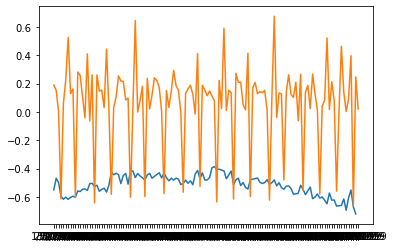

In [28]:
y_pred = res_function['forecast']
plt.plot(y_pred)
plt.plot(y_perc)

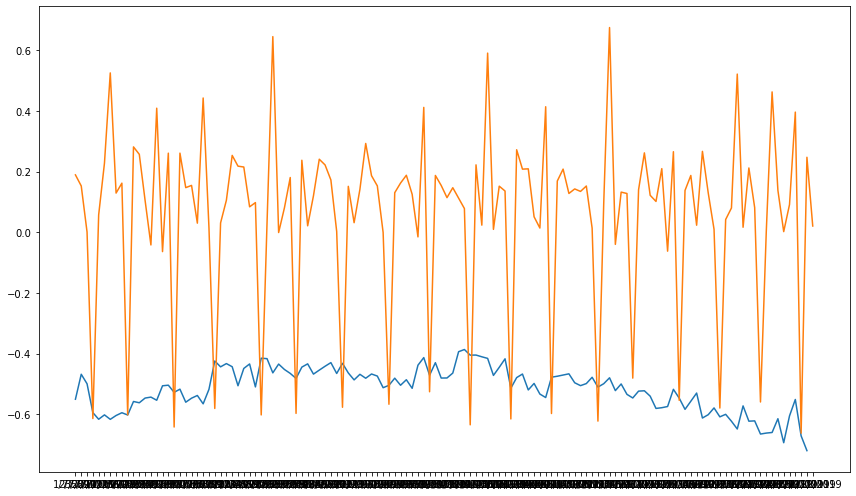

In [29]:
eval_utils.predicted_views(y_val.iloc[idx_psuedo_OOB-1:idx_OOB+1], y_pred)

### Extras

In [30]:
pharm_utils = build_and_model_VAR(df, ["Pharm","Utilities"])
data_prep.get_lagged_df(pharm_utils,col2lag=list(pharm_utils.columns), n=3)

,Open_Pharm,Volume_Pharm,Open_Utilities,Volume_Utilities,Open_SNP500,Volume_SNP500,Open_Pharm_L1,Open_Pharm_L2,Open_Pharm_L3,Volume_Pharm_L1,...,Open_Utilities_L3,Volume_Utilities_L1,Volume_Utilities_L2,Volume_Utilities_L3,Open_SNP500_L1,Open_SNP500_L2,Open_SNP500_L3,Volume_SNP500_L1,Volume_SNP500_L2,Volume_SNP500_L3
Date,,,,,,,,,,,,,,,,,,,,,
7/1/2010,63.320000,69800,42.270000,17635700,1971.439941,4188590000,47.680000,41.349998,32.544998,16400.0,...,31.410000,7856800.0,7193800.0,6426800.0,1682.410034,1440.900024,1143.489990,3.238690e+09,3.505080e+09,4.298910e+09
8/1/2010,62.919998,45200,43.389999,15646000,1919.650024,3983600000,63.320000,47.680000,41.349998,69800.0,...,36.430000,17635700.0,7856800.0,7193800.0,1971.439941,1682.410034,1440.900024,4.188590e+09,3.238690e+09,3.505080e+09
11/1/2010,64.480003,109300,52.490002,12578700,2926.290039,3364190000,62.919998,63.320000,47.680000,45200.0,...,37.490002,15646000.0,17635700.0,7856800.0,1919.650024,1971.439941,1682.410034,3.983600e+09,4.188590e+09,3.238690e+09
12/1/2010,32.959999,485200,31.840000,7347200,1185.709961,4129180000,64.480003,62.919998,63.320000,109300.0,...,42.270000,12578700.0,15646000.0,17635700.0,2926.290039,1919.650024,1971.439941,3.364190e+09,3.983600e+09,4.188590e+09
13/1/2010,33.619999,492400,34.349998,12200800,1251.000000,5645540000,32.959999,64.480003,62.919998,485200.0,...,43.389999,7347200.0,12578700.0,15646000.0,1185.709961,2926.290039,1919.650024,4.129180e+09,3.364190e+09,3.983600e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24/6/2019,33.334999,686600,33.259998,14075500,1185.369995,4586370000,31.430000,62.730000,54.529999,824000.0,...,54.259998,5398200.0,8681100.0,8852200.0,1101.150024,2857.189941,2465.350098,3.387770e+09,3.047050e+09,3.308060e+09
25/6/2019,46.990002,18000,37.029999,6507800,1656.849976,3102780000,33.334999,31.430000,62.730000,686600.0,...,52.970001,14075500.0,5398200.0,8681100.0,1185.369995,1101.150024,2857.189941,4.586370e+09,3.387770e+09,3.047050e+09
26/6/2019,62.709999,52100,43.240002,13414500,2000.729980,2882830000,46.990002,33.334999,31.430000,18000.0,...,31.520000,6507800.0,14075500.0,5398200.0,1656.849976,1185.369995,1101.150024,3.102780e+09,4.586370e+09,3.387770e+09


In [31]:
print(res.aic)
print(res.bic)
print(res.fittedvalues[-10:])

"""
If the model is an ARMAX and out-of-sample forecasting is requested, exog must be given. 
exog must be aligned so that exog[0] is used to produce the first out-of-sample forecast.
"""
# print(res.predict(start=2568, end=2570))

res.summary()

-9.337765489342223
-9.32807667692575
Date
17/6/2019    0.000564
18/6/2019    0.000404
19/6/2019    0.000027
20/6/2019    0.000401
21/6/2019    0.000055
24/6/2019    0.000591
25/6/2019    0.000527
26/6/2019    0.000874
27/6/2019    0.000440
28/6/2019    0.000277
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:       Adj Close_SNP500   No. Observations:                 2387
Model:                     AutoReg(2)   Log Likelihood                7755.117
Method:               Conditional MLE   S.D. of innovations              0.009
Date:                Fri, 10 Apr 2020   AIC                             -9.338
Time:                        20:23:34   BIC                             -9.328
Sample:                             2   HQIC                            -9.334
                                 2387                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               0.0005      0.000      2.388      0.017    8.23e-05       0.001
Adj Close_SNP500.L1    -0.0452      0.020     -2.206      0.027      -0.085      -0.005
Adj Close_SNP500.L2     0.0079      0.020      0.387      0.699      -0.032       0.048
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -8.7414           +0.0000j            8.7414            0.5000
AR.2           14.4468           +0.0000j           14.4468            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
df.columns